In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import logging
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth#Access the spotify credentials
import spotipy.util as util
from os.path import expanduser
import requests
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
!pip install requests

You should consider upgrading via the 'C:\Users\ouyangf\Python\python.exe -m pip install --upgrade pip' command.


In [3]:
os.chdir(os.path.join(expanduser("~"),"Desktop"))

In [4]:
os.getcwd()

'C:\\Users\\ouyangf\\Desktop'

In [5]:
import auth

In [6]:
mycolor = {"light_blue": "#7FB3D5"}

In [7]:

scope = (
    'playlist-modify-public '
    'user-library-read '
    'user-follow-read '
    'user-library-modify '
    'user-read-private '
    'user-top-read '
    'user-follow-modify '
    'user-read-recently-played '
    'ugc-image-upload '
    'user-read-playback-state '
)

In [8]:
sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(auth.client_id,auth.client_secret),auth_manager = SpotifyOAuth(client_id = auth.client_id, client_secret = auth.client_secret,scope = scope, redirect_uri = auth.redirect_url))
#results = sp.current_user_saved_tracks()
#for idx,item in enumerate(results["items"]):
  #  track = item["track"]
  #  print(idx,track["artists"][0]["name"],"-",track["name"])

In [9]:
res = sp.me()
print("=============")
print("My Account Info")
print("=============")
{k:v for k,v in res.items() if k in ['display_name', 'product']}

My Account Info


{'display_name': 'Fangqi', 'product': 'premium'}

In [11]:
sp.current_user()

{'country': 'US',
 'display_name': 'Fangqi',
 'email': 'ouyangfangqi89@gmail.com',
 'explicit_content': {'filter_enabled': False, 'filter_locked': False},
 'external_urls': {'spotify': 'https://open.spotify.com/user/j1rfydaakljbb7nqhud0raqlk'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/users/j1rfydaakljbb7nqhud0raqlk',
 'id': 'j1rfydaakljbb7nqhud0raqlk',
 'images': [],
 'product': 'premium',
 'type': 'user',
 'uri': 'spotify:user:j1rfydaakljbb7nqhud0raqlk'}

In [12]:
#Get the account information
print("==================")
print("My Account Info")
print("==================")
{k:v for k,v in sp.current_user().items() if k in ["display_name","product"]}

My Account Info


{'display_name': 'Fangqi', 'product': 'premium'}

In [13]:
#Get the list of the followed artists.
current_user_followed_artists = sp.current_user_followed_artists()["artists"]["items"]
artists_popularity = {}
for i in np.arange(len(current_user_followed_artists)):
    artists_popularity[current_user_followed_artists[i]["name"]] = current_user_followed_artists[i]["popularity"]


In [14]:
print(artists_popularity)

{'余佳運': 27, 'Jay Chou': 75, 'Li Jian': 41, 'Coldplay': 89, '錢正昊': 22, 'Joe Hisaishi': 69}


In [15]:
sp.current_user_recently_played()["items"][0]["track"]["album"]["name"]

'100種生活'

In [16]:
#Get the list of songs that the user currently played
recently_played = sp.current_user_recently_played()["items"]
recent_list = {}
for i in np.arange(len(recently_played)):
    recent_list[recently_played[i]["track"]["album"]["artists"][0]["name"]] = recently_played[i]["track"]["album"]["name"]


In [17]:
recent_list

{'Crowd Lu': '100種生活',
 'Yoga Lin': '美妙生活',
 '黃宣': '一天 (電視劇《想見你》插曲)',
 '寧桓宇': '只是太在意',
 'Various Artists': '人生若如初相見 (電視劇原聲帶)',
 'Waa Wei': '末路狂花',
 'Miriam Yeung': "Miriam's Music Box",
 'Shi Shi': 'Someday or One day',
 '831': '想見你想見你想見你(電視劇"想見你"片尾曲)',
 'Eric Nam': '봄인가 봐 Spring Love',
 'AKMU': 'WINTER',
 'CHANYEOL': 'Guardian (Original Television Soundtrack), Pt. 1',
 'Jay Chou': '依然范特西',
 'Joe Hisaishi': 'Spirited Away Soundtrack',
 'Taylor Swift': 'reputation',
 '余佳運': '不只是一首小插曲 (電視劇《我的莫格利男孩》插曲)',
 '颜人中': '某年某月某天',
 '霍尊': '天韵'}

In [18]:
#Get the currently saved albums
saved_albums = sp.current_user_saved_albums()

In [19]:
#Currently playing track
uri = "spotify:album:65akkilIEpQ5piyEjn2Ne3"
a = sp.album(uri)
print(a["tracks"]["items"][0]["uri"])

spotify:track:6Yh3MtuhWgAITpnbc3LQM2


In [20]:
#Get the audio features for the track above
sp.audio_features(a["tracks"]["items"][0]["uri"])

[{'danceability': 0.567,
  'energy': 0.5,
  'key': 7,
  'loudness': -6.746,
  'mode': 1,
  'speechiness': 0.0297,
  'acousticness': 0.644,
  'instrumentalness': 0,
  'liveness': 0.142,
  'valence': 0.197,
  'tempo': 127.95,
  'type': 'audio_features',
  'id': '6Yh3MtuhWgAITpnbc3LQM2',
  'uri': 'spotify:track:6Yh3MtuhWgAITpnbc3LQM2',
  'track_href': 'https://api.spotify.com/v1/tracks/6Yh3MtuhWgAITpnbc3LQM2',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6Yh3MtuhWgAITpnbc3LQM2',
  'duration_ms': 226567,
  'time_signature': 4}]

In [21]:
#Eract the top 10  tracks of an artists by country
current = sp.current_user_playing_track()
sample_current_artists = current["item"]["artists"][0]["uri"]

In [22]:
artist_top_tracks = sp.artist_top_tracks(sample_current_artists)

In [23]:
artist_top_tracks_lib = {}
for i in range(10):
    artist_top_tracks_lib[artist_top_tracks["tracks"][i]["name"]] = (artist_top_tracks["tracks"][i]["album"]["artists"][0]["name"],artist_top_tracks["tracks"][i]["uri"])


In [24]:
print("====== The top 10 tracks by %s  ====== \n" % artist_top_tracks["tracks"][i]["album"]["artists"][0]["name"])
print(artist_top_tracks_lib)

====== The top 10 tracks by Crowd Lu  ====== 

{'刻在我心底的名字 (Your Name Engraved Herein) - 電影<刻在你心底的名字>主題曲': ('Crowd Lu', 'spotify:track:3OC84eKMxRJ4x0Hcwl9i4i'), '幾分之幾 - 電影<花甲大人轉男孩>主題曲': ('Crowd Lu', 'spotify:track:4F7ZAsndEIJXyFzJUHNlRu'), '魚仔 - 電視劇<花甲男孩轉大人>主題曲': ('Crowd Lu', 'spotify:track:2sb6AZQLeoD3VgA4zglQB6'), '愛情怎麼了嗎': ('Crowd Lu', 'spotify:track:5ZaPc3ILOQT4Qc26AZe9od'), '不是我不明白': ('Fish Leong', 'spotify:track:22Dglcz1VwyXTCEBt6PIdG'), '我愛你': ('Crowd Lu', 'spotify:track:6CKLOHuoNU6hfAxlQVzRlL'), '大人中': ('Crowd Lu', 'spotify:track:2JJu8J1kvXs2GbUpQVbZ47'), '100種生活': ('Crowd Lu', 'spotify:track:0UBc4O6zhVuaepOq3lL91S'), '明仔載 (正式版) - 電影<花甲大人轉男孩>推廣曲': ('Crowd Lu', 'spotify:track:0sO03j2LRhw1Uoswf0BPtk'), '慢靈魂': ('Crowd Lu', 'spotify:track:1yBXM5UQikrweJN9iumrMq')}


In [25]:
track_lists = ['spotify:track:69zgyr5HVKdInjeKpq1qHa','spotify:track:2KZO634LWOlumo7bEJSh21','spotify:track:6xiFfSI1c48GZ7NXOFTLi3','spotify:track:2g4LLJeTduHXeX77hFWiXa','spotify:track:25tUA3vWZhsC8mHh8zcU23','spotify:track:3e12wnQn65ERiv96IChro2','spotify:track:3xWUw7uauZoCt7hPAJlJw2','spotify:track:642MdLHI0R3UgkHbfRtziD','spotify:track:1tOxV21YbdXfQX3EVvpPj7']

In [26]:
audio_features = pd.DataFrame.from_dict(sp.audio_features(track_lists),orient = 'columns')

In [27]:
audio_features.shape

(9, 18)

In [28]:
audio_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [29]:
feature_columns = ["acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness",
"valence","tempo"]

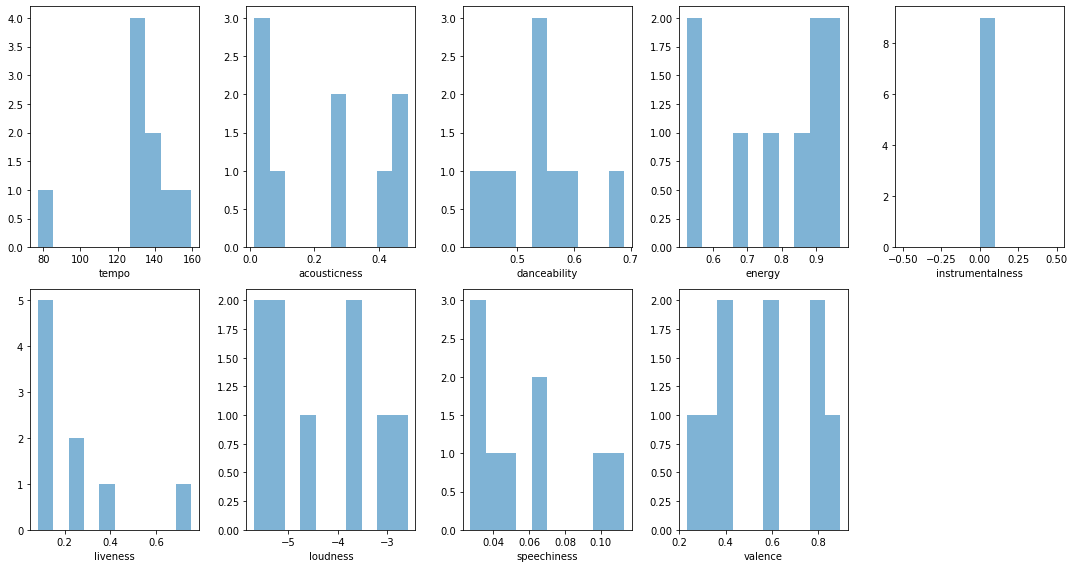

In [30]:
fig,axes = plt.subplots(nrows = 2,ncols = 5,figsize = (15,8))
for i in np.arange(2):
    for j in np.arange(5):
        axes[i,j].hist(audio_features[feature_columns[(i*5)+j-1]],color = mycolor["light_blue"],bins = 10)
        axes[i,j].set_xlabel(feature_columns[(i*5)+j-1])
fig.tight_layout() #This controls the extra padding around the figure padding
fig.delaxes(ax = axes[1,4])


In [31]:
sp.current_playback()["item"]["name"]

'If I was the memory'

In [32]:
sp.current_playback()["item"]["name"]

'If I was the memory'

In [65]:
new_release = sp.new_releases(country = "US",limit = 50) #Us newly released albums, 50 maximum

In [ ]:
#artist_uri || artist_name  || release_date ||  # tracks || type || available market 

In [66]:
new_release["albums"]["items"][0]["artists"][0]["name"]

'Marshmello'

In [74]:
#new_release["albums"]["items"][0]["available_markets"]

In [76]:
new_release_df = []
for i in np.arange(len(new_release["albums"]["items"])):
    dict0 = {}
    dict0["artist_uri"] = new_release["albums"]["items"][i]["artists"][0]["uri"]
    dict0["artist_name"] = new_release["albums"]["items"][i]["artists"][0]["name"]
    dict0["release_date"] = new_release["albums"]["items"][i]["release_date"]
    dict0["number tracks"] = new_release["albums"]["items"][i]["total_tracks"]
    dict0["album_type"] = new_release["albums"]["items"][i]["album_type"]
    dict0["available market"] = new_release["albums"]["items"][0]["available_markets"]
    new_release_df.append(dict0)

In [77]:
new_release_df_0 = pd.DataFrame.from_dict(new_release_df)

In [79]:
new_release_df_0.to_csv("new_release_df.csv",index = False)

In [81]:
c = sp.current_user_playing_track()

In [97]:
c["item"]["artists"][0]["uri"]
c["item"]["uri"]

'spotify:artist:2elBjNSdBE2Y3f0j1mjrql'

'spotify:track:32nainF4TXsMpuFOGCkzzM'

In [122]:
recom = sp.recommendations(seed_artists = [c["item"]["artists"][0]["uri"]],seed_tracks = [c["item"]["uri"]])

In [123]:
recom_df = []
#tack_name || track_uri || artist_name || artist_uri || available_market

In [113]:
sp.recommendations(seed_artists = [c["item"]["artists"][0]["uri"]],seed_tracks = [c["item"]["uri"]])["tracks"][0]["artists"][0]["name"]

'Jay Chou'

In [124]:
for i in range(len(recom["tracks"])):
    recom_0 = {}
    recom_0["track_name"] = recom["tracks"][i]["name"]
    recom_0["track_uri"] = recom["tracks"][i]["uri"]
    recom_0["artist_name"] = recom["tracks"][i]["artists"][0]["name"]
    recom_0["artist_uri"] = recom["tracks"][i]["artists"][0]["uri"]
    recom_df.append(recom_0)

In [125]:
recom_df = pd.DataFrame.from_dict(recom_df)

In [150]:
sp.current_user_playing_track()["item"]["uri"]
sp.current_user_playing_track()["item"]["artists"][0]["uri"]

'spotify:track:6Uq8BnOxvXJsQiJ2XqfO5P'

'spotify:artist:2elBjNSdBE2Y3f0j1mjrql'

In [152]:
name_song = sp.current_user_playing_track()["item"]["name"]
name_artist = sp.current_user_playing_track()["item"]["artists"][0]["name"]

In [159]:
print("The avilable markets for %s by %s includes: \n " %(name_song, name_artist))
sp.search_markets("artist:spotify:artist:0PdNEiQ3MsJGCEgE13Tz60 track:spotify:track:0L7rQrY1zzUYUzJAkUuZ0B").keys()

The avilable markets for 稻香 by Jay Chou includes: 
 


dict_keys(['AD', 'AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'EC', 'SV', 'EE', 'FI', 'FR', 'DE', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'ID', 'IE', 'IT', 'JP', 'LV', 'LI', 'LT', 'LU', 'MY', 'MT', 'MX', 'MC', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'ES', 'SK', 'SE', 'CH', 'TW', 'TR', 'GB', 'US', 'UY'])